In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r'D:/data_science/Research/16.csv')
df.head()

,type,time,sender,attackerType,messageID,pos/0,pos/1,pos/2,pos_noise/0,pos_noise/1,pos_noise/2,spd/0,spd/1,spd/2,spd_noise/0,spd_noise/1,spd_noise/2
0,4,25200.006694,331,0,973,5409.774101,5794.384047,1.895,0,0,0,-1.181680e+01,-3.873119e+00,0,0,0,0
1,4,25200.008074,967,0,1222,4432.548015,5295.893829,1.895,0,0,0,-4.185271e-14,2.025677e-14,0,0,0,0
2,4,25200.022232,343,0,1490,3183.877664,5248.375527,1.895,0,0,0,-9.082662e-01,3.630137e-01,0,0,0,0
3,4,25200.022270,685,0,1647,6086.261942,5727.892587,1.895,0,0,0,0.000000e+00,0.000000e+00,0,0,0,0
4,4,25200.022339,841,0,1857,6224.827920,6021.888413,1.895,0,0,0,-1.528587e+01,5.422040e+00,0,0,0,0


In [3]:
df.drop(['type','pos_noise/0','pos_noise/1','pos_noise/2','spd_noise/2','spd_noise/1','spd_noise/0','spd/2'],axis = 1, inplace = True)

In [4]:
x = df[['time','sender','messageID','pos/0','pos/1','pos/2','spd/0','spd/1']]
y = df.iloc[:,2:3].values

In [5]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state = 0)
x, y = smk.fit_sample(x,y)

Using TensorFlow backend.
C:\Users\Jayesh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Jayesh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Jayesh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Jayesh\anaconda3\lib\site-packages\tensorflow\python\framework\dtype

In [6]:
#Spliting dataset into Train and Test set 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)

In [7]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [8]:
#Building Model
from sklearn.neighbors import KNeighborsClassifier
reg = KNeighborsClassifier(n_neighbors = 12)
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)

In [9]:

#checking Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 79.55%


[[3164  511]
 [1013 2765]]


C:\Users\Jayesh\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Text(0.5, 1, 'KNN')

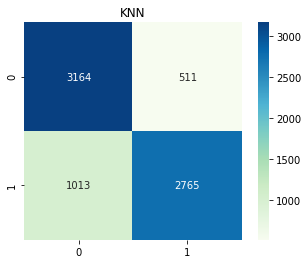

In [10]:
#confusion matrix
from sklearn.metrics import confusion_matrix
con = confusion_matrix(y_test,y_pred)
print(con)
import seaborn as sns
import matplotlib.pyplot as plt
axes = sns.heatmap(con, square=True,annot=True,fmt='d',cbar = True, cmap = plt.cm.GnBu)
ax = plt.axes()
ax.set_title('KNN')

In [11]:
from sklearn.metrics import classification_report
print('KNN')
print(classification_report(y_test, y_pred))

KNN
              precision    recall  f1-score   support

           0       0.76      0.86      0.81      3675
          16       0.84      0.73      0.78      3778

    accuracy                           0.80      7453
   macro avg       0.80      0.80      0.79      7453
weighted avg       0.80      0.80      0.79      7453



[0.33333333 0.16666667 0.83333333 ... 1.         0.58333333 0.16666667]
Logistic : ROC AUC = 0.900


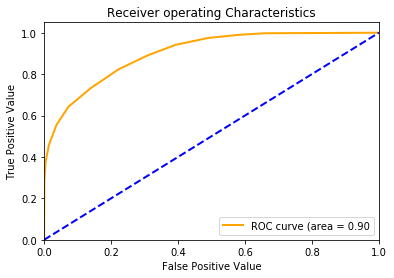

In [12]:
#ROC and AUC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
clf_probs = reg.predict_proba(x_test)
clf_probs = clf_probs[:,1]
print(clf_probs)
ras = roc_auc_score(y_test,clf_probs)
print("Logistic : ROC AUC = %.3f" %(ras))
from sklearn.preprocessing import label_binarize
y = label_binarize(y_test,classes = [0,16])
n_classes = y.shape[1]
fpr,tpr,_ = roc_curve(y,clf_probs)
plt.figure()
lw = 2
plt.plot(fpr,tpr, color = "orange", lw = lw, label = "ROC curve (area = %0.2f" % ras)
plt.plot([0,1],[0,1], color = "blue",lw = lw, linestyle = '--')
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.05)
plt.xlabel('False Positive Value')
plt.ylabel('True Positive Value')
plt.title('Receiver operating Characteristics')
plt.legend(loc = "lower right")
plt.show()